In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks
from matplotlib.ticker import FuncFormatter
import missingno as miss

import seaborn as sns
import numpy as np
# import statsmodels.tsa.api as tsa

pd.set_option('display.float_format',lambda x:f"{x:,.2f}")

In [2]:
## Creating dataframe
df_zillow = pd.read_csv("Data/City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
df_zillow.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"253,690.00","255,517.00",...,"741,586.00","745,686.00","750,578.00","756,734.00","762,321.00","768,797.00","773,944.00","777,692.00","779,960.00","781,622.00"
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,"234,181.00","234,401.00",...,"924,019.00","928,991.00","937,936.00","953,874.00","973,168.00","990,391.00","992,337.00","992,630.00","978,196.00","966,595.00"
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,"109,068.00","109,079.00",...,"245,783.00","248,718.00","252,080.00","256,435.00","261,101.00","265,558.00","268,901.00","271,059.00","272,400.00","272,639.00"
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,"166,139.00","166,536.00",...,"302,821.00","305,104.00","306,404.00","308,303.00","309,649.00","312,487.00","314,663.00","315,910.00","315,587.00","315,429.00"
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,"114,794.00","114,975.00",...,"269,323.00","274,032.00","278,464.00","284,127.00","289,739.00","294,776.00","297,727.00","298,796.00","299,124.00","298,951.00"


## Filtering and Preparing Dataframe
---


In [3]:
## Filtering dataframe
## df_home = df_zillow.loc[df_zillow["SizeRank"] < 5, :].copy()

In [4]:
df = df_zillow.sort_values('SizeRank').head(4)
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"253,690.00","255,517.00",...,"741,586.00","745,686.00","750,578.00","756,734.00","762,321.00","768,797.00","773,944.00","777,692.00","779,960.00","781,622.00"
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,"234,181.00","234,401.00",...,"924,019.00","928,991.00","937,936.00","953,874.00","973,168.00","990,391.00","992,337.00","992,630.00","978,196.00","966,595.00"
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,"109,068.00","109,079.00",...,"245,783.00","248,718.00","252,080.00","256,435.00","261,101.00","265,558.00","268,901.00","271,059.00","272,400.00","272,639.00"
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,"166,139.00","166,536.00",...,"302,821.00","305,104.00","306,404.00","308,303.00","309,649.00","312,487.00","314,663.00","315,910.00","315,587.00","315,429.00"


In [5]:
## Converting from wide-form to long-form
##id_vars = df.columns[:8]
##df = pd.melt(df, id_vars = id_vars, var_name = "Date", value_name = "Value")
##df.head()

In [6]:
id_cols = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName']

melted = pd.melt(df, id_vars=id_cols, value_name="Typical Home Value", var_name='Month')
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Month,Typical Home Value
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,"253,690.00"
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,"234,181.00"
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,"109,068.00"
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,"166,139.00"
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,"255,517.00"
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,"315,587.00"
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,"781,622.00"
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,"966,595.00"
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,"272,639.00"


In [7]:
## Converting data column to datetime data type 
melted["Month"] = pd.to_datetime(melted["Month"])
melted.dtypes

RegionID                       int64
SizeRank                       int64
RegionName                    object
RegionType                    object
StateName                     object
State                         object
Metro                         object
CountyName                    object
Month                 datetime64[ns]
Typical Home Value           float64
dtype: object

In [8]:
## Setting Date as index
melted = melted.set_index("Month")
melted.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Typical Home Value
Month,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"253,690.00"
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,"234,181.00"
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,"109,068.00"
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,"166,139.00"
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"255,517.00"


In [9]:
## Resampling time series to a monthly basis grouped by city
df_try = melted.groupby("RegionName").resample("M").asfreq("M")
df_try.head()

RegionID  SizeRank RegionName RegionType StateName  \
RegionName Month                                                            
Chicago    2000-01-31     17426         3    Chicago       city        IL   
           2000-02-29     17426         3    Chicago       city        IL   
           2000-03-31     17426         3    Chicago       city        IL   
           2000-04-30     17426         3    Chicago       city        IL   
           2000-05-31     17426         3    Chicago       city        IL   

                      State                               Metro   CountyName  \
RegionName Month                                                               
Chicago    2000-01-31    IL  Chicago-Naperville-Elgin, IL-IN-WI  Cook County   
           2000-02-29    IL  Chicago-Naperville-Elgin, IL-IN-WI  Cook County   
           2000-03-31    IL  Chicago-Naperville-Elgin, IL-IN-WI  Cook County   
           2000-04-30    IL  Chicago-Naperville-Elgin, IL-IN-WI  Cook County   
           2000-05-31    IL  Chicago-Naperville-Elgin, IL-IN-WI  Cook County   

                       Typical Home Value  
RegionName Month                           
Chicago    2000-01-31          166,139.00  
           2000-02-29          166,536.00  
           2000-03-31          167,368.00  
           2000-04-30          168,826.00  
           2000-05-31          170,499.00

In [10]:
df_try.head().index

MultiIndex([('Chicago', '2000-01-31'),
            ('Chicago', '2000-02-29'),
            ('Chicago', '2000-03-31'),
            ('Chicago', '2000-04-30'),
            ('Chicago', '2000-05-31')],
           names=['RegionName', 'Month'])

## Data Visualization
---

In [11]:
## Unstacking data frame for visualization
unstacked = df_try.unstack(level=0)
unstacked

RegionID                              SizeRank                      \
RegionName  Chicago Houston Los Angeles New York  Chicago Houston Los Angeles   
Month                                                                           
2000-01-31    17426   39051       12447     6181        3       2           1   
2000-02-29    17426   39051       12447     6181        3       2           1   
2000-03-31    17426   39051       12447     6181        3       2           1   
2000-04-30    17426   39051       12447     6181        3       2           1   
2000-05-31    17426   39051       12447     6181        3       2           1   
...             ...     ...         ...      ...      ...     ...         ...   
2022-05-31    17426   39051       12447     6181        3       2           1   
2022-06-30    17426   39051       12447     6181        3       2           1   
2022-07-31    17426   39051       12447     6181        3       2           1   
2022-08-31    17426   39051       12447     6181        3       2           1   
2022-09-30    17426   39051       12447     6181        3       2           1   

                    RegionName           ...  \
RegionName New York    Chicago  Houston  ...   
Month                                    ...   
2000-01-31        0    Chicago  Houston  ...   
2000-02-29        0    Chicago  Houston  ...   
2000-03-31        0    Chicago  Houston  ...   
2000-04-30        0    Chicago  Houston  ...   
2000-05-31        0    Chicago  Houston  ...   
...             ...        ...      ...  ...   
2022-05-31        0    Chicago  Houston  ...   
2022-06-30        0    Chicago  Houston  ...   
2022-07-31        0    Chicago  Houston  ...   
2022-08-31        0    Chicago  Houston  ...   
2022-09-30        0    Chicago  Houston  ...   

                                         Metro  \
RegionName                         Los Angeles   
Month                                            
2000-01-31  Los Angeles-Long Beach-Anaheim, CA   
2000-02-29  Los Angeles-Long Beach-Anaheim, CA   
2000-03-31  Los Angeles-Long Beach-Anaheim, CA   
2000-04-30  Los Angeles-Long Beach-Anaheim, CA   
2000-05-31  Los Angeles-Long Beach-Anaheim, CA   
...                                        ...   
2022-05-31  Los Angeles-Long Beach-Anaheim, CA   
2022-06-30  Los Angeles-Long Beach-Anaheim, CA   
2022-07-31  Los Angeles-Long Beach-Anaheim, CA   
2022-08-31  Los Angeles-Long Beach-Anaheim, CA   
2022-09-30  Los Angeles-Long Beach-Anaheim, CA   

                                                    CountyName                 \
RegionName                               New York      Chicago        Houston   
Month                                                                           
2000-01-31  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   
2000-02-29  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   
2000-03-31  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   
2000-04-30  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   
2000-05-31  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   
...                                           ...          ...            ...   
2022-05-31  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   
2022-06-30  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   
2022-07-31  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   
2022-08-31  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   
2022-09-30  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   

                                              Typical Home Value             \
RegionName         Los Angeles       New York            Chicago    Houston   
Month                                                                         
2000-01-31  Los Angeles County  Queens County         166,139.00 109,068.00   
2000-02-29  Los Angeles County  Queens County      

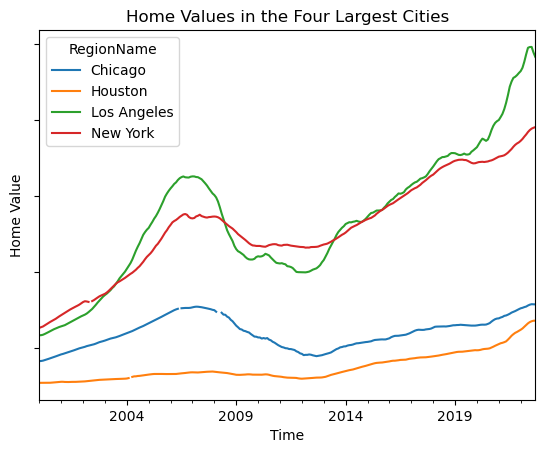

In [12]:
## Visualizing trends
ax = unstacked["Typical Home Value"].plot()
ax.set_title("Home Values in the Four Largest Cities")
ax.set_ylabel("Home Value")
ax.set_xlabel("Time")

## Question One
---
Which City had the highest Typical Home Value at the end of 2008? Which had the least?

In [13]:
## Finding the city with the highest typical home value at the end of 2008
cities = ["Chicago", "Houston", "Los Angeles", "New York"]
question_one_max = {}
for x in cities:
    city_2008 = df_try.loc[pd.IndexSlice[x, "12/2008"],:]
    city_max = city_2008["Typical Home Value"].max()
    question_one_max[x] = city_max
    
question_one_max

{'Chicago': 265306.0,
 'Houston': 131283.0,
 'Los Angeles': 469294.0,
 'New York': 510309.0}

## Question Two:
---
How much did the home values change from November 2008 to December 2008 (in dollars)?


In [22]:
## Looping to find the change in value in from November to December
df_diff = df_try["Typical Home Value"].diff().copy()
change = {}
for x in cities:
    amount_change = df_diff.loc[x, "12/2008"]
    change[x] = amount_change
    
change

{'Chicago': Month
 2008-12-31   -5,753.00
 Freq: M, Name: Typical Home Value, dtype: float64,
 'Houston': Month
 2008-12-31   -964.00
 Freq: M, Name: Typical Home Value, dtype: float64,
 'Los Angeles': Month
 2008-12-31   -12,611.00
 Freq: M, Name: Typical Home Value, dtype: float64,
 'New York': Month
 2008-12-31   -4,458.00
 Freq: M, Name: Typical Home Value, dtype: float64}